# Overview

"Explanatory" visualizations are created in order to explain something to other people. These are made to inform **general, non-technical audiences**. Thus, we want to make a chart with the following characteristics:

- Eye-catching
- Visually pleasing
- Easy to understand
- Has a clear main point, as opposed to being too detailed

Put simply, it is **similar to an infographic**. However, instead of being a standalone image, it is usually put in an article with accompanying text.

In this project, I detail the process of designing an explanatory chart of USD-PHP exchange rates. I used the ["Forex data since 2011-1-1"](https://www.kaggle.com/altinsoyemrecan/daily-updated-forex-data-since-201111) dataset, which was uploaded by user `emrecanaltinsoy` on Kaggle. By the end of the project, I was able to make the following chart.

![A chart about USD-PHP exchange rates over time.](images/2021-05-28-explanatory-chart.png){fig-align="center"}

:::{.callout-tip}

The larger implications of exchange rate trends are beyond the scope of this project. For Filipinos, I suggest reading ["[ANALYSIS] Why the stronger peso mirrors a weaker PH economy"](https://www.rappler.com/voices/thought-leaders/analysis-why-stronger-peso-mirrors-weaker-philippine-economy) (Punongbayan 2020), which is an interesting recent article.

:::

:::{.callout-note}

I wrote this notebook for the [Dataquest](https://www.dataquest.io/) course's [Guided Project: Storytelling Data Visualization on Exchange Rates](https://app.dataquest.io/m/529/guided-project%3A-storytelling-data-visualization-on-exchange-rates/7/next-steps). However, all of the text and code here are written by me unless stated otherwise.

:::

# Package Installs

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.lines as lines

# Use matplotlib's default style.
style.use("default")

# Data Overview

The ["Forex data since 2011-1-1"](https://www.kaggle.com/altinsoyemrecan/daily-updated-forex-data-since-201111) dataset contains USD exchange rates for various currencies, each in a different column. Every row corresponds to one day, and the dataset has been updated every day since January 1, 2011. My copy was downloaded on May 27, 2021.

Below are the first 5 rows of the dataset.

In [77]:
exchange = pd.read_csv("./private/2021-05-28-MEC-Files/forex_usd_data.csv")

exchange.head()

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.9690,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.34,1.537400,3.67310,0.640553,4.3
1,2011-01-02,3.9690,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.34,1.537400,3.67310,0.641067,4.3
2,2011-01-03,3.9735,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.39,1.557411,3.67320,0.645615,4.3
3,2011-01-04,3.9710,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.36,1.547801,3.67315,0.641558,4.3
4,2011-01-05,3.9715,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.38,1.543853,3.67310,0.645308,4.3


We are only interested in USD-PHP exchange rates, so we will take the "Philippine Peso" column.

In [78]:
php = exchange[["date(y-m-d)", "Philippine Peso"]].copy()

php.head()

,date(y-m-d),Philippine Peso
0,2011-01-01,43.639999
1,2011-01-02,43.639999
2,2011-01-03,43.799999
3,2011-01-04,43.550002
4,2011-01-05,43.900002


Below is more information on the 2 columns.

In [79]:
php.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date(y-m-d)      3798 non-null   object 
 1   Philippine Peso  3798 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.5+ KB


The dataset has 3798 entries and 2 columns. There are no missing values.

The date column contains text, whereas the PHP column contains decimal numbers.

# Data Cleaning

## Column Labels

The column labels will first be changed so that these are easier to use.

In [80]:
php.columns = ["date", "usd_php"]
php.head()

,date,usd_php
0,2011-01-01,43.639999
1,2011-01-02,43.639999
2,2011-01-03,43.799999
3,2011-01-04,43.550002
4,2011-01-05,43.900002


## Date Column

The `date` column contains text with the format {4 digit year}-{2 digit month}-{2 digit day}.

Below, I convert the text to `datetime` objects for ease of use.

In [81]:
php["date"] = pd.to_datetime(php["date"])
php.sort_values(
    by = "date",
    ascending = True,
    inplace = True,
)
    
php["date"]

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
3793   2021-05-21
3794   2021-05-22
3795   2021-05-23
3796   2021-05-24
3797   2021-05-25
Name: date, Length: 3798, dtype: datetime64[ns]

## Descriptive Statistics

Before we can clean the data, we have to view its descriptive statistics.

In [82]:
php.describe(datetime_is_numeric = True)

,date,usd_php
count,3798,3798.000000
mean,2016-03-13 12:00:00,47.010148
min,2011-01-01 00:00:00,3.094050
25%,2013-08-07 06:00:00,43.639330
50%,2016-03-13 12:00:00,46.890740
75%,2018-10-18 18:00:00,50.584238
max,2021-05-25 00:00:00,54.323583
std,NaN,3.920411


As expected, the dates range from November 1, 2011 to May 25, 2021. 

However, the minimum USD-PHP exchange rate in the data is 3.09. This is very low compared to the other percentiles.

## Exchange Rate Outliers

There may be some outliers in the data. We can confirm this using a boxplot.

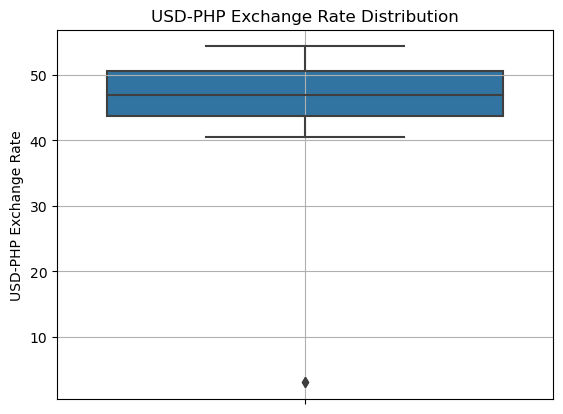

In [83]:
sns.boxplot(
    data = php,
    y = "usd_php"
)

plt.title("USD-PHP Exchange Rate Distribution")
plt.ylabel("USD-PHP Exchange Rate")
plt.grid(True)
plt.show()

Indeed, most of the values fall between 40 and 55, whereas a few outliers exist below 10. These may be inaccurate data.

How many outliers are there?

In [84]:
(php["usd_php"]
 .value_counts(bins = 10)
 .sort_index()
)

(3.0420000000000003, 8.217]       2
(8.217, 13.34]                    0
(13.34, 18.463]                   0
(18.463, 23.586]                  0
(23.586, 28.709]                  0
(28.709, 33.832]                  0
(33.832, 38.955]                  0
(38.955, 44.078]               1157
(44.078, 49.201]               1289
(49.201, 54.324]               1350
Name: usd_php, dtype: int64

There are only 2 values less than 10. It is highly unlikely that these values are accurate. This can be shown using a line chart.

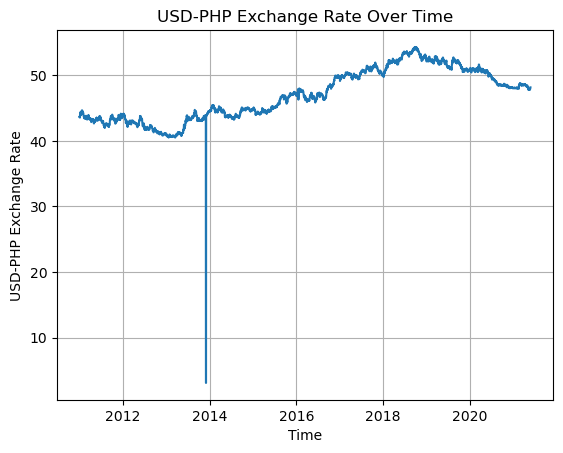

In [85]:
sns.lineplot(
    data = php,
    x = "date",
    y = "usd_php",
)

plt.title("USD-PHP Exchange Rate Over Time")
plt.xlabel("Time")
plt.ylabel("USD-PHP Exchange Rate")
plt.grid(True)
plt.show()

The outliers exist somewhere in the 2014 data, and they create an unnatural dip in the chart.

Thus, the inaccurate datapoints will be dropped from the dataset.

In [86]:
php = php.loc[php["usd_php"] > 10]

php.describe(datetime_is_numeric = True)

,date,usd_php
count,3796,3796.000000
mean,2016-03-13 22:32:45.015806208,47.033285
min,2011-01-01 00:00:00,40.500000
25%,2013-08-06 18:00:00,43.639981
50%,2016-03-14 12:00:00,46.892504
75%,2018-10-19 06:00:00,50.584680
max,2021-05-25 00:00:00,54.323583
std,NaN,3.789566


The minimum USD-PHP rate is now 40.5, which makes more sense.

# Exploratory Data Analysis

## Basic Line Chart

First, we start with a basic line chart that shows the exchange rates on all days in the dataset.

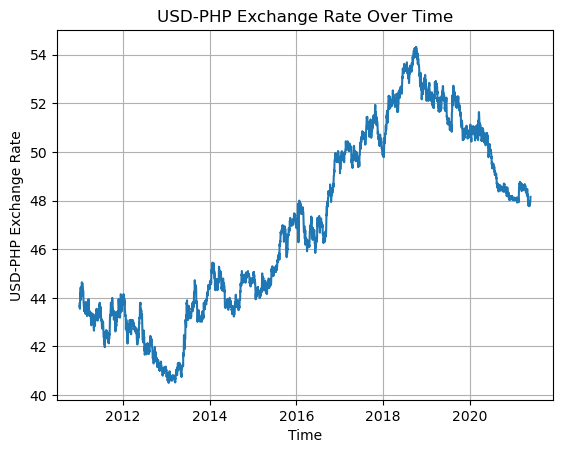

In [87]:
sns.lineplot(
    data = php,
    x = "date",
    y = "usd_php",
)

plt.title("USD-PHP Exchange Rate Over Time")
plt.xlabel("Time")
plt.ylabel("USD-PHP Exchange Rate")
plt.grid(True)
plt.show()

The chart shows that the exchange rate dropped to under 41.0 in 2013. It then steadily climbed up to over 54.0 in 2018 before moving down again afterwards.

For Filipinos, it is ideal for the USD-PHP rate to be lower so that the peso has more power. Thus, it can be said that the exchange rate was better from 2011 to 2015 compared to how it has been in recent years. However, note that the USD-PHP exchange rate is not the only descriptor of the Philippines' economy.

## Rolling Average

In order to focus more on general trends than small fluctuations, we can graph the **rolling average** (or moving average). The rolling average is taken by replacing each datapoint with the mean average of a certain number of the datapoints leading up to it.

Using a rolling average can make a graph look **visually cleaner** and make **general trends** easier to see.

The number of datapoints used in each average is called the rolling window. This can be specified in Pandas using `pd.Series.rolling()`. Below, we use a rolling window of 182 days (around half a year) in order to transform the rate data.

In [88]:
php["rolling"] = php["usd_php"].rolling(182).mean()
php.tail()

,date,usd_php,rolling
3793,2021-05-21,47.919983,48.237840
3794,2021-05-22,47.929517,48.236031
3795,2021-05-23,47.929517,48.234226
3796,2021-05-24,48.068599,48.232923
3797,2021-05-25,48.155798,48.232809


The last 5 rows of the dataset are shown above. The rolling averages are not exactly equal to the original numbers, but these are close enough to show the same trend.

A line chart of the rolling averages is shown below.

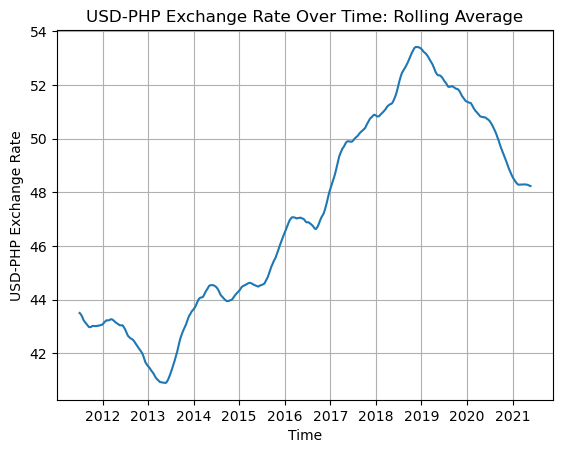

In [89]:
sns.lineplot(
    data = php,
    x = "date",
    y = "rolling",
)

plt.title("USD-PHP Exchange Rate Over Time: Rolling Average")
plt.xlabel("Time")
plt.ylabel("USD-PHP Exchange Rate")
plt.grid(True)
plt.show()

The same trends mentioned earlier are clearer to see in the above chart.

# Explanatory Chart

One idea of a useful chart would be to compare the USD-PHP exchange rate trends before and during the COVID-19 pandemic.

:::{.callout-note}

A similar idea was suggested in the Dataquest guided project. However, I did not look at Dataquest's solution notebook. I wrote my code on my own.

:::

## Key Concepts

The following concepts will be used throughout the process of designing the chart. I learned these from Dataquest's "Data Scientist in Python" course.

### Familiarity

Audiences prefer **familiar charts** since they can understand these easily. Therefore, it is better to use a basic chart as a template than to use something obscure or create something entirely new.

In the case of showing USD-PHP exchange rates over time, it is best to use a **basic line chart** as a template.

### Data-Ink Ratio

When making an explanatory chart, one must maximize the data-ink ratio.

- Data refers to the elements that represent data and its relationships, like **bars and lines**.
- Ink refers to the **total amount of ink** that the chart would use if it were printed on paper.

Maximizing the data-ink ratio means focusing more on data-related elements and **minimizing the use of other, less important elements**.

This helps the audience understand the main point without being distracted by other details.

### Gestalt Psychology

[Gestalt psychology](https://www.verywellmind.com/what-is-gestalt-psychology-2795808) is founded on the idea that people tend to **see patterns** rather than individual objects.

Under Gestalt psychology, there are several Principles of Grouping. These are ways to visually group elements together.

- Proximity: Elements are close to each other
- Similarity: Elements are similar due to color, shape, etc.
- Enclosure: Elements are enclosed in an outer shape, like a rectangle
- Connection: Elements are connected by a form, usually a line

When designing charts, these are helpful in **implying relationships between elements** instead of explicitly stating them.

## Visual Style

Before we start making the chart, we have to choose a style.

I chose Matplotlib's built-in "fivethirtyeight" style. It's based on the style of the charts used on the [FiveThirtyEight](https://fivethirtyeight.com/) website by Nate Silver.

Additionally, I used [color-hex.com](https://www.color-hex.com/) to get hex codes for specific kinds of blue, orange, and dark gray that I want to use in my chart.

In [90]:
# Use the FiveThirtyEight style of charts.
style.use("fivethirtyeight")

# Color hex codes
c_blue = "#14c4dd"
c_orange = "#ffa500"
c_dark_gray = "#d2d2d2"

## Setting up Subplots

In order to make the chart fresh and interesting, we have to make it more complex than 1 plot with a line chart. In our case, I have the following ideas:

- Show 2 line charts, one on top of the other.
- The upper chart shows how the rate changed from 2011 to 2021.
- The lower chart zooms into the pandemic portion of the line chart from 2020 to 2021.

In order to do this, I will create a Matplotlib `Figure` with two `Axes` (subplots), as described above.

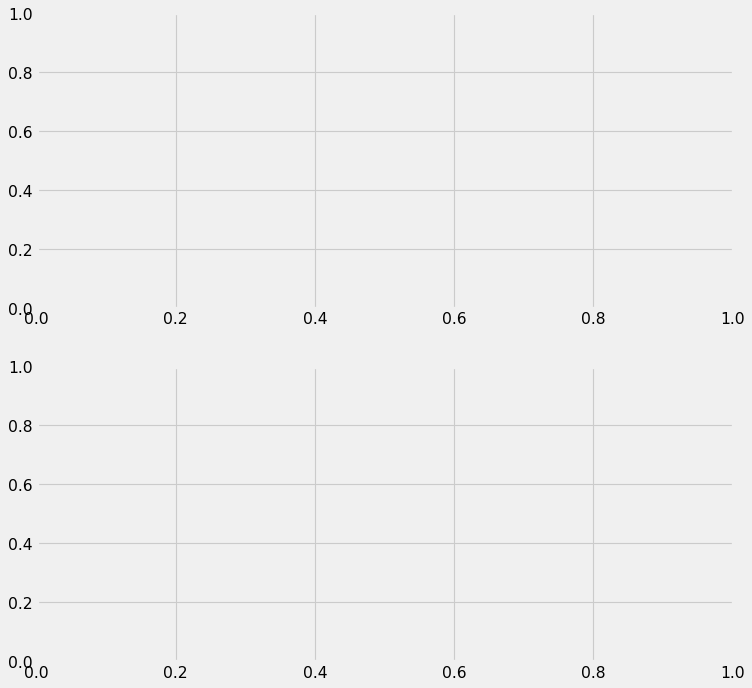

In [91]:
# Figure has 2 rows and 1 column.
# There is an upper and lower subplot.
fig, (ax1, ax2) = plt.subplots(
    nrows = 2,
    ncols = 1,
    figsize = (10, 10), # 10 inches x 10 inches
    dpi = 80,
)

## The Upper Subplot

Next, we design the upper subplot. Here's what it looks like with a basic line chart of the raw exchange rate data.

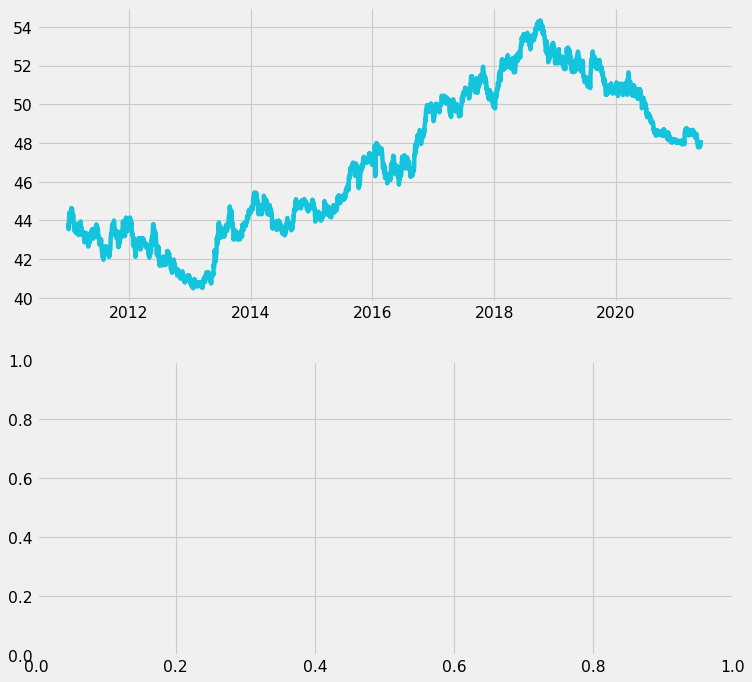

In [92]:
ax1.plot(
    php["date"],
    php["usd_php"],
    color = c_blue,
)

fig

The line above looks messy. For the general audience, the overall trends are more important than the specific daily values. Thus, we will use the **rolling average** to make the chart cleaner. 

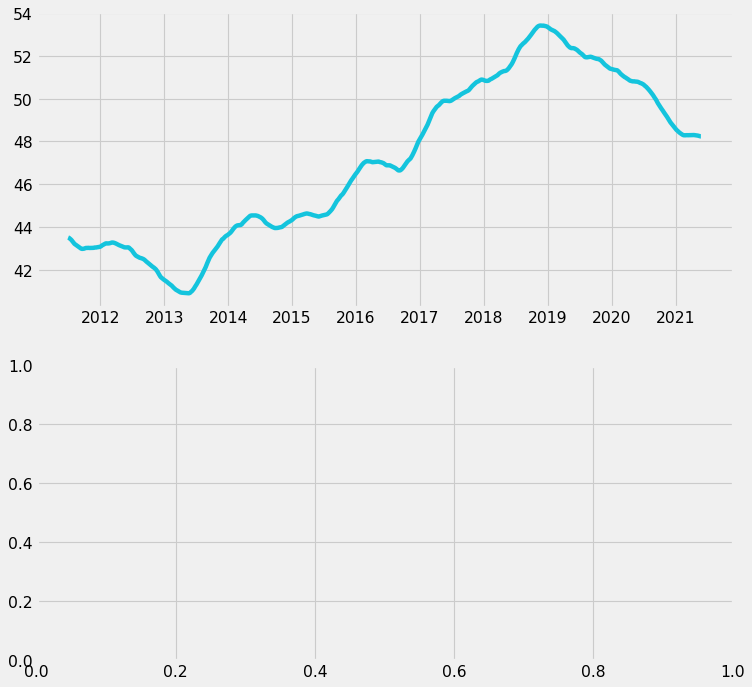

In [93]:
ax1.clear()

ax1.plot(
    php["date"],
    php["rolling"],
    color = c_blue,
)

fig

Additionally, we will split the line into:

- The pre-pandemic portion (blue)
- The pandemic portion (orange)

The pandemic portion will also be enclosed in a dark gray box, in order to further separate it from the pre-pandemic portion.

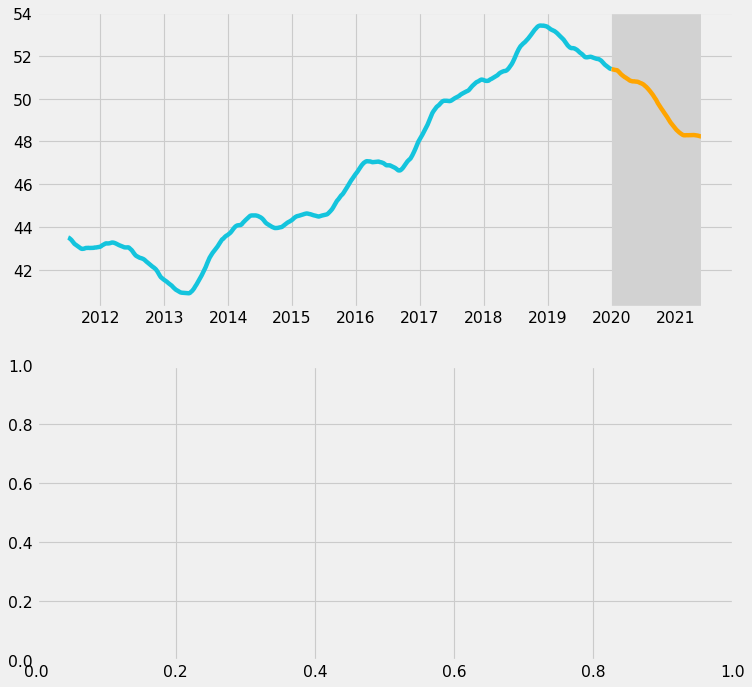

In [94]:
ax1.clear()

# Main line chart (2011-2019)
php_pre = php.loc[php["date"].dt.year < 2020]
ax1.plot(
    php_pre["date"],
    php_pre["rolling"],
    color = c_blue,
)

# Pandemic part of line chart (2020-2021)
php_pandemic = php.loc[php["date"].dt.year.between(2020, 2021)]
ax1.plot(
    php_pandemic["date"],
    php_pandemic["rolling"],
    color = c_orange,
)

# Special background for pandemic portion
ax1.axvspan(
    "2020-01",
    "2021-05-25",
    facecolor = c_dark_gray,
    alpha = 1,
)

fig

Next, we want to maximize the data-ink ratio by removing unnecessary elements. We will do the following:

- On the x-axis, show only the labels for 2012, 2016, and 2020.
- On the y-axis, show only the labels for 48, 50, and 52.
- Remove grid lines.

We will also add 1 grid line at y = 50 so that it can guide viewers. It would be particularly helpful for Filipino viewers since they commonly think that USD 1 = PHP 50.

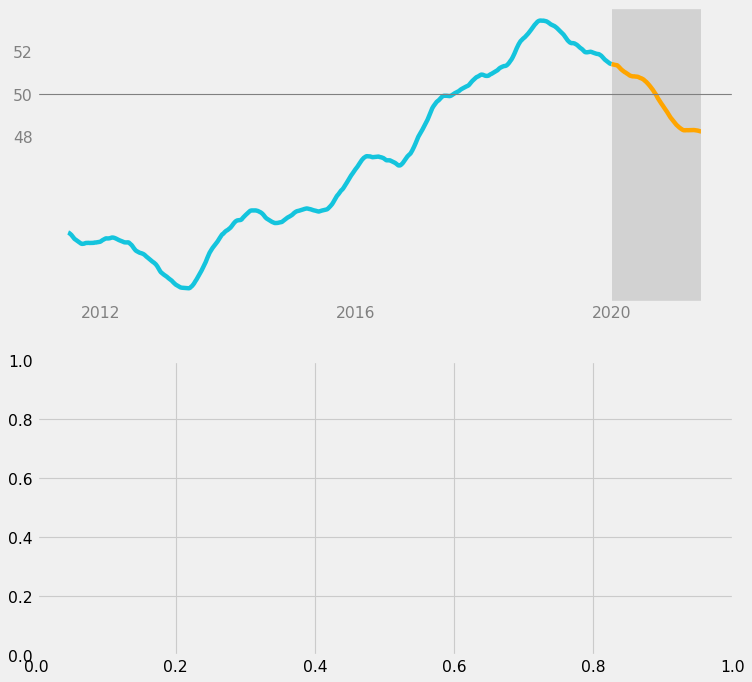

In [95]:
# Set tick label color to gray.
ax1.tick_params(axis = 'both', colors = 'gray')

# Specific tick labels
ax1.set_xticks(["2012", "2016", "2020"])
ax1.set_xticklabels(["2012", "2016", "2020"])

ax1.set_yticks([48, 50, 52])
ax1.set_yticklabels(["48", "50", "52"])

# Remove grid
ax1.grid(False)

# Horizontal line at y = 50
ax1.axhline(50, linewidth = 1, color = "gray")

fig

Now, the upper subplot is much cleaner; there is less visual noise.

The last step for the upper subplot would be to add informative text:

- "Pre-Pandemic" label for the blue line
- A comment about the upward trend leading up to 2018

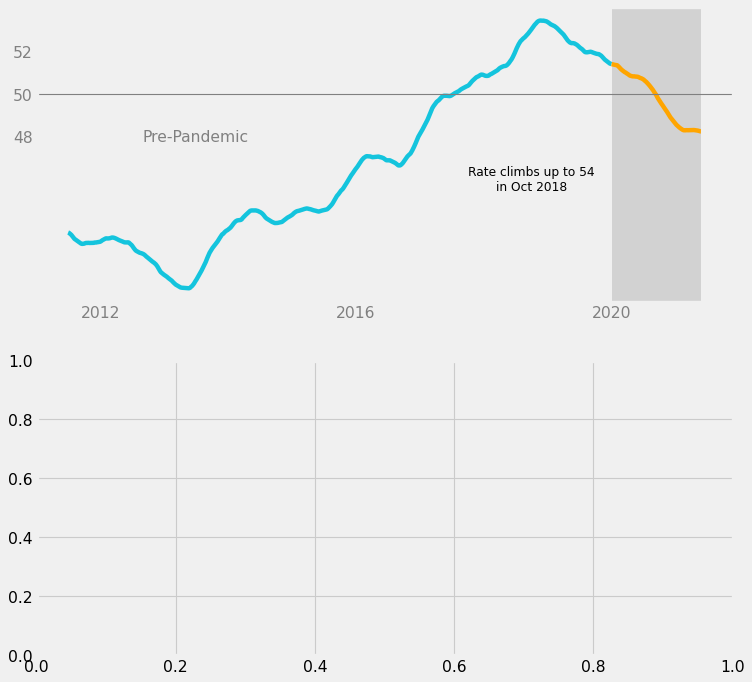

In [96]:
# "Pre-Pandemic" label
ax1.text(
    x = dt.date(year = 2013, month = 7, day = 1),
    y = 48,
    s = "Pre-Pandemic",
    color = "gray",
    size = 14,
    ha = "center",
    va = "center",
)

# Comment on upward trend
ax1.text(
    x = dt.date(year = 2018, month = 10, day = 1),
    y = 46,
    s = "Rate climbs up to 54\nin Oct 2018",
    color = "black",
    size = 11,
    ha = "center",
    va = "center",
)

fig

The "Pre-Pandemic" label was set to gray because it is a structural element; it is less important.

On the other hand, the long comment was set to black because it states a statistic from the data and helps tell a story about the data. It is more important, so it should be darker.

We have finished designing the upper subplot.

## Lower Subplot

Next, the lower subplot will zoom in on the pandemic portion of the data, which is from 2020 to 2021. Since this is the more important part, we should use the **raw data** for more detail.

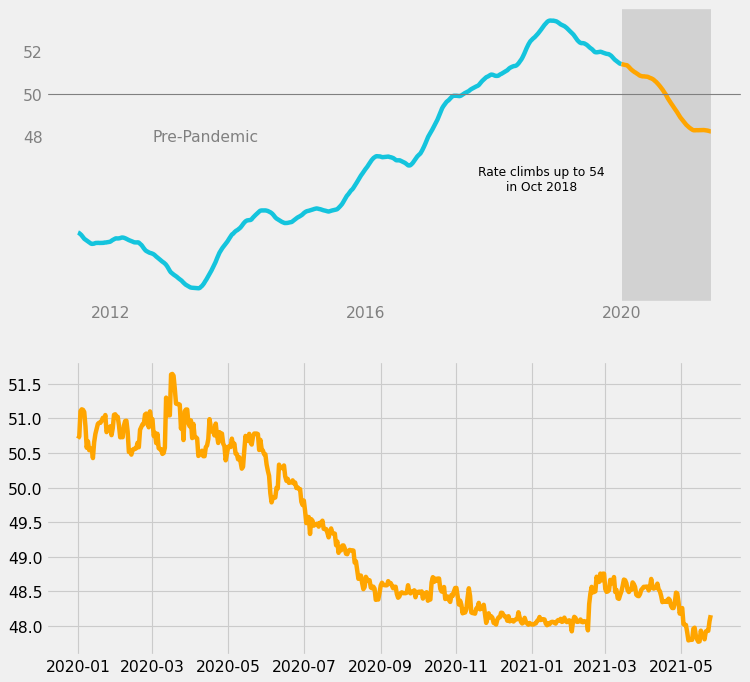

In [97]:
# Pandemic portion, zoomed in
ax2.plot(
    php_pandemic["date"],
    php_pandemic["usd_php"],
    color = c_orange,
)

fig

Then, we will make changes similar to the ones done for the upper subplot:

- On the x-axis, show only the labels for January 2020, July 2020, and January 2021.
- On the y-axis, show only the labels for 48, 50, and 52.
- Remove grid lines.
- Add 1 grid line at y = 50.
- Enclose the entire line in a dark gray box.

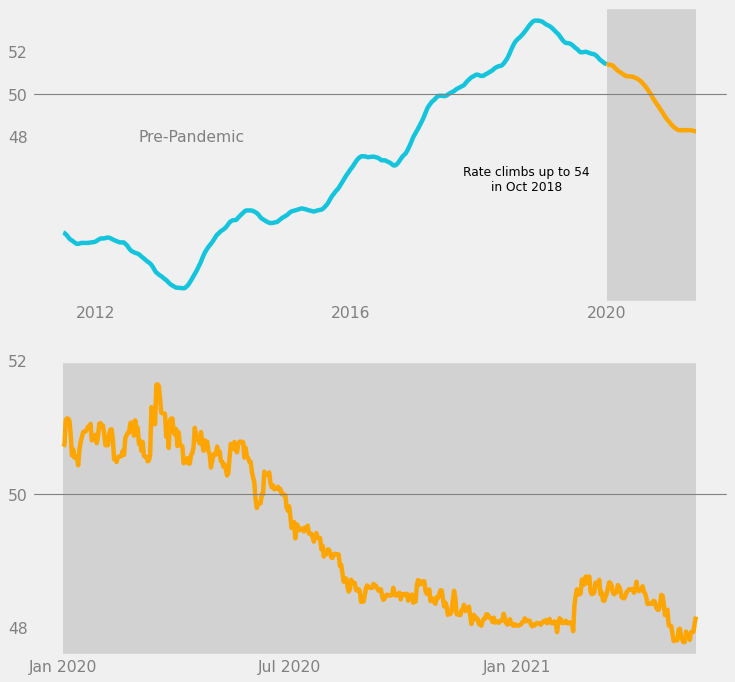

In [98]:
# Set tick labels to gray.
ax2.tick_params(axis = 'both', colors = 'gray')

# Specific tick labels.
ax2.set_xticks(["2020-01", "2020-07", "2021-01"])
ax2.set_xticklabels(['Jan 2020', 'Jul 2020', 'Jan 2021'])

ax2.set_yticks([48, 50, 52])
ax2.set_yticklabels(["48", "50", "52"])

# Remove grid
ax2.grid(False)

# Horizontal line at y = 50
ax2.axhline(50, linewidth = 1, color = "gray")

# Special background for pandemic portion
ax2.axvspan(
    "2020-01",
    "2021-05-25",
    facecolor = c_dark_gray,
    alpha = 1,
)

fig

We are using the principles of **enclosure** and **similarity** to visually imply that the pandemic portion in the upper subplot is being shown more closely in the lower subplot.

- Enclosure: dark gray boxes
- Similarity: orange lines, horizontal grid line, y-axis labels

Next, we add another comment in black text, this time about the downward trend leading up to the present day.

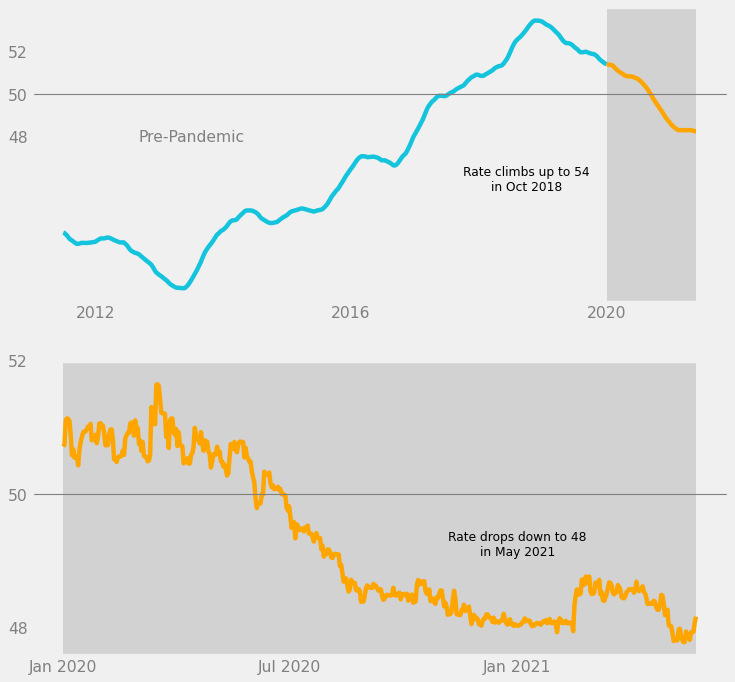

In [99]:
# Comment on downward trend
ax2.text(
    x = dt.date(year = 2021, month = 1, day = 1),
    y = 49.25,
    s = "Rate drops down to 48\nin May 2021",
    color = "black",
    size = 11,
    ha = "center",
    va = "center",
)

fig

We have finished designing the lower subplot. However, we still need to add some finishing touches.

## Figure-Level Customization

In this last step, we customize the chart on the level of the Matplotlib `Figure`. This involves both of the subplots and the space around them.

What we want to do is to use the principles of **proximity** and **connection** to make the relationship between the 2 subplots even clearer.

- Proximity: Increase the space between the two subplots.
- Connection: Draw a line connecting the two dark gray boxes.
    - Add a "COVID-19 Pandemic" label next to the line.

These are done in the code below.

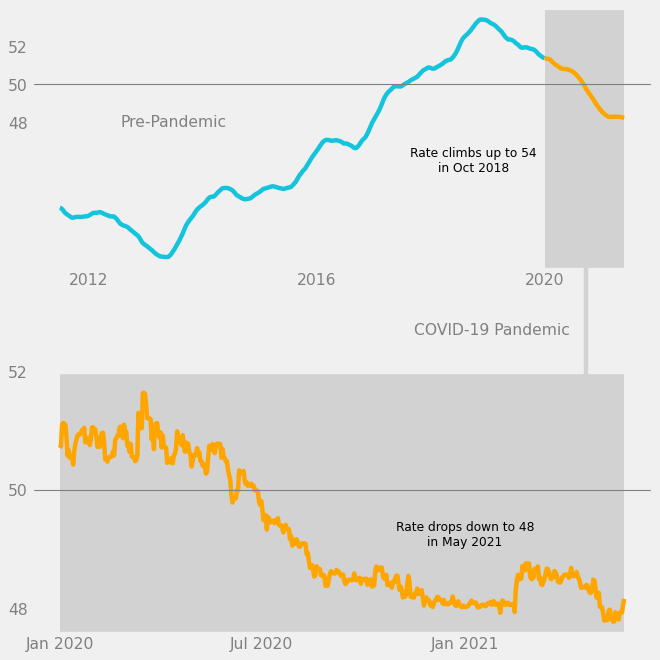

In [100]:
# Add space between the subplots
fig.tight_layout(pad = 5)

# Line connection between gray boxes
fig.add_artist( 
    lines.Line2D(
        xdata = [0.82, 0.82],
        ydata = [0.44, 0.585],
        color = c_dark_gray,
        alpha = 1,
    )
)

# "COVID-19" label between subplots
fig.text(
    x = 0.8,
    y = 0.5,
    s = "COVID-19 Pandemic",
    color = "gray",
    size = 14,
    ha = "right",
    va = "center",
)

fig

Now, when one first reads the chart, it is very clear that the gray boxes contain data about exchange rates in the COVID-19 pandemic.

The last touch would be to add a title and subtitle to the chart. Since the title is typically the first thing a viewer reads on a chart, it is best to **state a statistic** related to the data, like "USD-PHP Rate Drops to 48 after 1 Year in the Pandemic."

This way, **the title becomes a data element**. The data-ink ratio is increased.

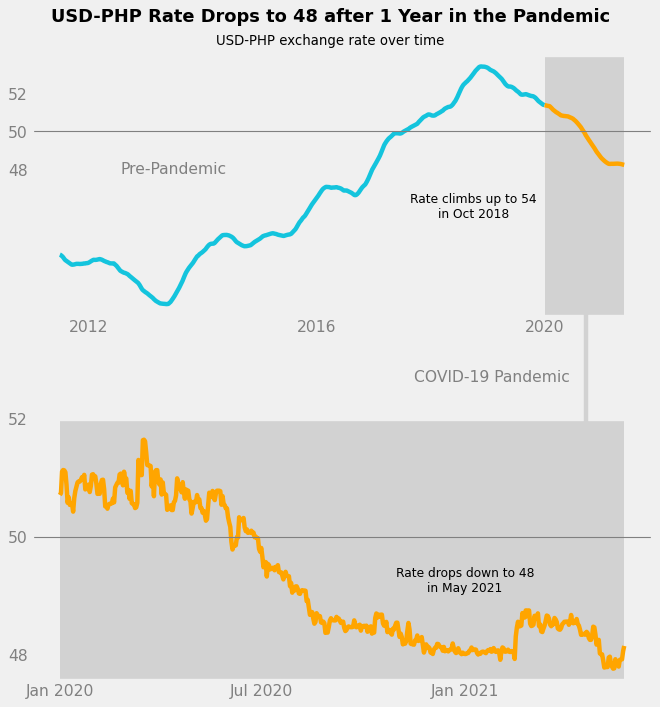

In [101]:
# Title with a statistic
fig.text(
    x = 0.5,
    y = 0.95,
    s = "USD-PHP Rate Drops to 48 after 1 Year in the Pandemic",
    size = 16,
    weight = "bold",
    ha = "center",
    va = "center",
)

# Subtitle
fig.text(
    x = 0.5,
    y = 0.92,
    s = "USD-PHP exchange rate over time",
    size = 12,
    ha = "center",
    va = "center",
)

fig

That's it. The explanatory chart is complete.

## Full Code

The full code to make the graph is shown below. The comments explain which part does what.

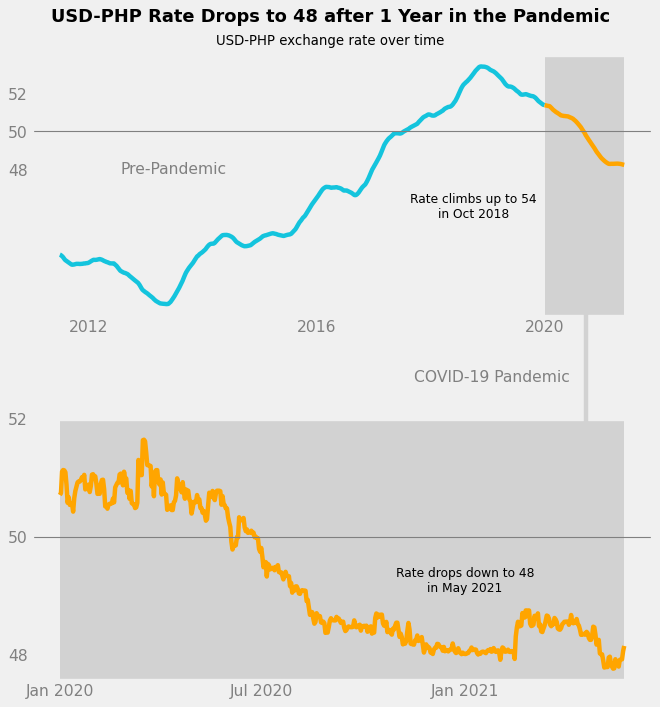

In [103]:
# Use the FiveThirtyEight style of charts.
style.use("fivethirtyeight")

# Color hex codes
c_blue = "#14c4dd"
c_orange = "#ffa500"
c_dark_gray = "#d2d2d2"

# Figure has 2 rows and 1 column.
# There is an upper and lower subplot.
fig, (ax1, ax2) = plt.subplots(
    nrows = 2,
    ncols = 1,
    figsize = (10, 10),
    dpi = 80,
)



# ---UPPER subplot

# Main line chart (2011-2019)
php_pre = php.loc[php["date"].dt.year < 2020]
ax1.plot(
    php_pre["date"],
    php_pre["rolling"],
    color = c_blue,
)

# Pandemic part of line chart (2020-2021)
php_pandemic = php.loc[php["date"].dt.year.between(2020, 2021)]
ax1.plot(
    php_pandemic["date"],
    php_pandemic["rolling"],
    color = c_orange,
)

# Special background for pandemic portion
ax1.axvspan(
    "2020-01",
    "2021-05-25",
    facecolor = c_dark_gray,
    alpha = 1,
)

# Set tick label color to gray.
ax1.tick_params(axis = 'both', colors = 'gray')

# Specific tick labels
ax1.set_xticks(["2012", "2016", "2020"])
ax1.set_xticklabels(["2012", "2016", "2020"])

ax1.set_yticks([48, 50, 52])
ax1.set_yticklabels(["48", "50", "52"])

# Remove grid
ax1.grid(False)

# Horizontal line at y = 50
ax1.axhline(50, linewidth = 1, color = "gray")

# Text in upper subplot
ax1.text(
    x = dt.date(year = 2018, month = 10, day = 1),
    y = 46,
    s = "Rate climbs up to 54\nin Oct 2018",
    color = "black",
    size = 11,
    ha = "center",
    va = "center",
)
ax1.text(
    x = dt.date(year = 2013, month = 7, day = 1),
    y = 48,
    s = "Pre-Pandemic",
    color = "gray",
    size = 14,
    ha = "center",
    va = "center",
)



# ---LOWER subplot

# Pandemic portion, zoomed in
ax2.plot(
    php_pandemic["date"],
    php_pandemic["usd_php"],
    color = c_orange,
)

# Set tick labels to gray.
ax2.tick_params(axis = 'both', colors = 'gray')

# Specific tick labels.
ax2.set_xticks(["2020-01", "2020-07", "2021-01"])
ax2.set_xticklabels(['Jan 2020', 'Jul 2020', 'Jan 2021'])

ax2.set_yticks([48, 50, 52])
ax2.set_yticklabels(["48", "50", "52"])

# Remove grid
ax2.grid(False)

# Horizontal line at y = 50
ax2.axhline(50, linewidth = 1, color = "gray")

# Special background for pandemic portion
ax2.axvspan(
    "2020-01",
    "2021-05-25",
    facecolor = c_dark_gray,
    alpha = 1,
)

# Text in lower subplot
ax2.text(
    x = dt.date(year = 2021, month = 1, day = 1),
    y = 49.25,
    s = "Rate drops down to 48\nin May 2021",
    color = "black",
    size = 11,
    ha = "center",
    va = "center",
)




# ---FIGURE level customization
# Add space between the subplots
fig.tight_layout(pad = 5)

# Line connection between pandemic parts
fig.add_artist( 
    lines.Line2D(
        xdata = [0.82, 0.82],
        ydata = [0.44, 0.585],
        color = c_dark_gray,
        alpha = 1,
    )
)

# Title with statistic
fig.text(
    x = 0.5,
    y = 0.95,
    s = "USD-PHP Rate Drops to 48 after 1 Year in the Pandemic",
    size = 16,
    weight = "bold",
    ha = "center",
    va = "center",
)

# Subtitle
fig.text(
    x = 0.5,
    y = 0.92,
    s = "USD-PHP exchange rate over time",
    size = 12,
    ha = "center",
    va = "center",
)

# "COVID-19" label between subplots
fig.text(
    x = 0.8,
    y = 0.5,
    s = "COVID-19 Pandemic",
    color = "gray",
    size = 14,
    ha = "right",
    va = "center",
)



# Save chart locally.
plt.savefig("./private/2021-05-28-MEC-Files/2021-05-28-explanatory-chart.png")

# Show chart
plt.show()

# Conclusion

In this project, we cleaned and explored data about USD-PHP exchange rates over time.

We then discussed several key concepts in the creation of an explanatory chart, such as Familiarity, Data-Ink Ratio, and Gestalt Psychology. These concepts were applied throughout the process of making an explanatory chart that compared exchange rate trends before and during the pandemic. 

We were ultimately able to create a chart that is simple and clean, yet eye-catching and informative.

Thanks for reading!